In [6]:
!pip install ultralytics
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 16.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [7]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [8]:
class Model_config:
    EPOCHS = 30
    BATCH_SIZE = 32
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'
    
    DATA_PATH = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml'
    SAMPLE_PATH = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images/*'

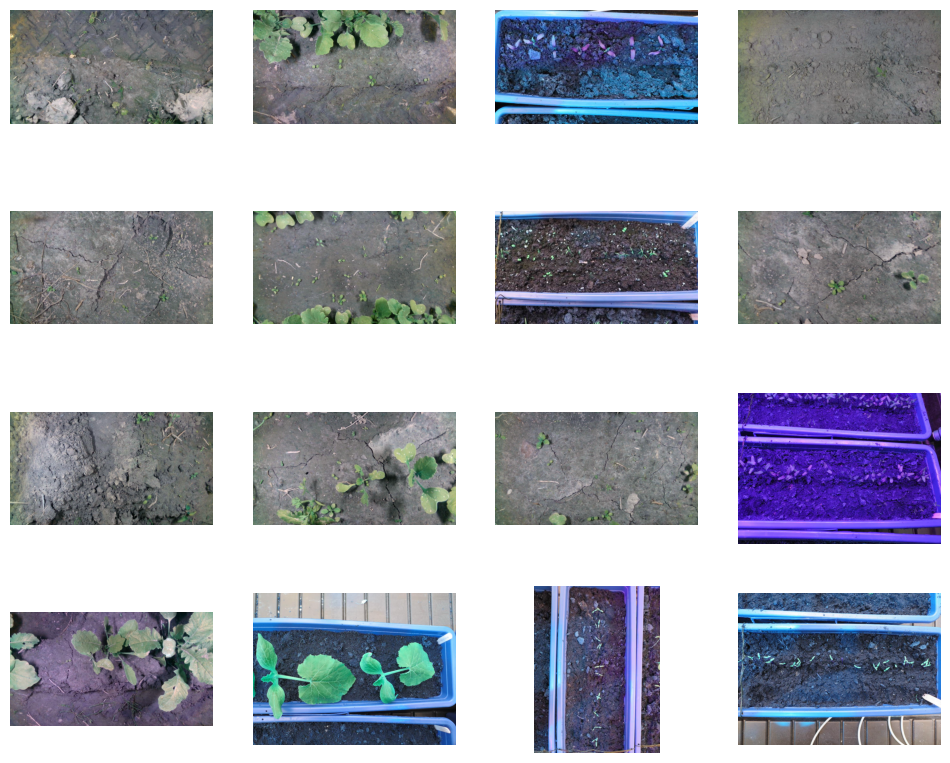

In [9]:
images_data = glob(Model_config.SAMPLE_PATH)
random_image = random.sample(images_data, Model_config.NUM_SAMPLES)

plt.figure(figsize=(12,10))
for i in range(Model_config.NUM_SAMPLES):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

In [10]:
yolo_v8 = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 235MB/s]


In [11]:
model = yolo_v8.train(data=Model_config.DATA_PATH,seed=Model_config.SEED,
                      epochs=Model_config.EPOCHS, lr0=Model_config.LEARNING_RATE,
                      optimizer=Model_config.OPTIMIZER, verbose=True,
                      project='ft_models',  
                      name='yolo_v8')

Ultralytics 8.3.157 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_v8, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, pe

100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 78.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.9±11.3 MB/s, size: 81.1 KB)


train: Scanning /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/train/labels... 2469 images, 101 backgrounds, 0 corrupt: 100%|██████████| 2469/2469 [00:06<00:00, 374.07it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.3±0.4 ms, read: 34.4±9.9 MB/s, size: 120.9 KB)


val: Scanning /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid/labels... 235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<00:00, 337.08it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid is not writeable, cache not saved.


Plotting labels to ft_models/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.19G      2.593      2.384      1.296         27        640: 100%|██████████| 155/155 [01:17<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        235       1605      0.304      0.491      0.342      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.16G      2.472      2.012      1.237         48        640: 100%|██████████| 155/155 [01:20<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        235       1605      0.447      0.338      0.235      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.22G      2.459      1.993      1.233         37        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]


                   all        235       1605      0.477      0.468      0.473      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       7.3G      2.424      1.956      1.213         32        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


                   all        235       1605      0.308      0.431      0.282      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.36G      2.352      1.856      1.202         60        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        235       1605      0.443      0.546      0.473      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.58G      2.268      1.764      1.168         39        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        235       1605      0.385      0.478      0.363      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.35G      2.245      1.699      1.169         72        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        235       1605      0.535      0.458      0.476      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       7.3G      2.209       1.63      1.139         36        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        235       1605      0.481      0.496      0.473       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.37G      2.133       1.57       1.12         44        640: 100%|██████████| 155/155 [01:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        235       1605      0.501      0.506      0.444      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.38G      2.095      1.497      1.105         33        640: 100%|██████████| 155/155 [01:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        235       1605      0.626      0.528      0.583      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.44G      2.046      1.466       1.09         27        640: 100%|██████████| 155/155 [01:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]


                   all        235       1605      0.542       0.56       0.52      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.52G      2.028      1.434      1.086         52        640: 100%|██████████| 155/155 [01:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        235       1605      0.552      0.682      0.693      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.58G      2.008      1.405      1.082         34        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        235       1605      0.582      0.707      0.671      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.72G      1.978      1.349      1.076         25        640: 100%|██████████| 155/155 [01:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        235       1605      0.664       0.73      0.701      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.85G      1.956      1.344       1.07         31        640: 100%|██████████| 155/155 [01:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        235       1605      0.554      0.671      0.625      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.98G      1.928      1.305      1.067         47        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        235       1605      0.613      0.669      0.699      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.17G      1.914      1.273       1.06         60        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        235       1605      0.663      0.702      0.683      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.65G      1.865      1.233      1.051         39        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        235       1605      0.657      0.702       0.72      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.02G      1.859      1.246      1.047         40        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        235       1605      0.721       0.69      0.783      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.02G      1.832      1.205      1.037         57        640: 100%|██████████| 155/155 [01:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        235       1605      0.706      0.688      0.743       0.36


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.06G      1.776       1.15      1.055         16        640: 100%|██████████| 155/155 [01:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        235       1605      0.679      0.681      0.694      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.12G      1.753      1.134      1.047         34        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        235       1605      0.694      0.674      0.712      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.18G      1.721      1.099       1.04         25        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        235       1605      0.626      0.768      0.691      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.25G      1.695      1.077      1.035         32        640: 100%|██████████| 155/155 [01:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        235       1605      0.756      0.695      0.781      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.32G      1.669      1.052      1.022         14        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        235       1605      0.712      0.719       0.75      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.39G      1.654      1.027      1.016         42        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        235       1605      0.654      0.762       0.74      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.38G      1.619      1.005       1.01         14        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        235       1605      0.682        0.7      0.717      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.38G      1.585     0.9729      1.003         29        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        235       1605      0.719      0.683      0.718      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.44G      1.552     0.9494     0.9963         21        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        235       1605      0.574       0.76      0.697      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.88G      1.542     0.9395     0.9921         37        640: 100%|██████████| 155/155 [01:19<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        235       1605      0.659      0.717      0.714      0.377



30 epochs completed in 0.694 hours.
Optimizer stripped from ft_models/yolo_v8/weights/last.pt, 52.0MB
Optimizer stripped from ft_models/yolo_v8/weights/best.pt, 52.0MB

Validating ft_models/yolo_v8/weights/best.pt...
Ultralytics 8.3.157 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


                   all        235       1605      0.721       0.69      0.783      0.428
                  crop         17         47      0.661      0.723      0.801      0.444
                  weed        228       1558       0.78      0.657      0.765      0.412
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to ft_models/yolo_v8


In [15]:
def weed_detection(img_path, model):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

In [16]:
custom_image_dir = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images'
image_files = os.listdir(custom_image_dir)
selected_images = random.sample(image_files, 16)

In [23]:
selected_images

['IMG_5949_JPG.rf.415d64b877765e8f2c7a0774df004066.jpg',
 '32757_jpg.rf.602a1d18b252432bacfe0d750395be40.jpg',
 'IMG_5974_JPG.rf.d0aa40e2b53291f9dbb1bd4f1f6366c5.jpg',
 'IMG_6167_JPG.rf.bec2a8e882a5db1b83c9e20926300688.jpg',
 'IMG_6175_JPG.rf.7aa4d9d1099520875c8a7c79a71de110.jpg',
 '317_jpg.rf.c7f0907204ab5da50ae42cf2336b2444.jpg',
 '32746_jpg.rf.8df0d3b767cd8390af6830e5c81f1641.jpg',
 '34019_jpg.rf.6f011d82fa669a46a3e1940b7ea799ed.jpg',
 '32711_jpg.rf.98f5da71d91086011e43eb84ca34aaee.jpg',
 '33128_jpg.rf.4ed32849f32bfcdbfe29ad92e46d5ed2.jpg',
 '33668_jpg.rf.c0c12a420b7652fb69c9d247b705af2f.jpg',
 '34300_jpg.rf.75abdd0fffe875aed73c1ccb9934c019.jpg',
 '34266_jpg.rf.0e597928cebf60f0eb300a3cc0137acc.jpg',
 '38441_jpg.rf.7e7d96e91ce85b9a49da1e1e738e49db.jpg',
 'IMG_5915_JPG.rf.095608f6993ac98a984d812b7d981f90.jpg',
 '34036_jpg.rf.be6eb4ecca9faeb2b365e64d8707f5da.jpg']


0: 480x640 6 crops, 5 weeds, 45.4ms
Speed: 2.5ms preprocess, 45.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 7 weeds, 25.2ms
Speed: 1.6ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 640x480 6 crops, 3 weeds, 43.7ms
Speed: 2.3ms preprocess, 43.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 27 weeds, 27.5ms
Speed: 2.6ms preprocess, 27.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 640x512 9 crops, 43.8ms
Speed: 1.9ms preprocess, 43.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)

0: 384x640 1 crop, 1 weed, 24.5ms
Speed: 1.7ms preprocess, 24.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 weeds, 23.5ms
Speed: 1.6ms preprocess, 23.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 weed, 19.3ms
Speed: 1.6ms preprocess, 19.3ms inference, 1.5ms postprocess per image a

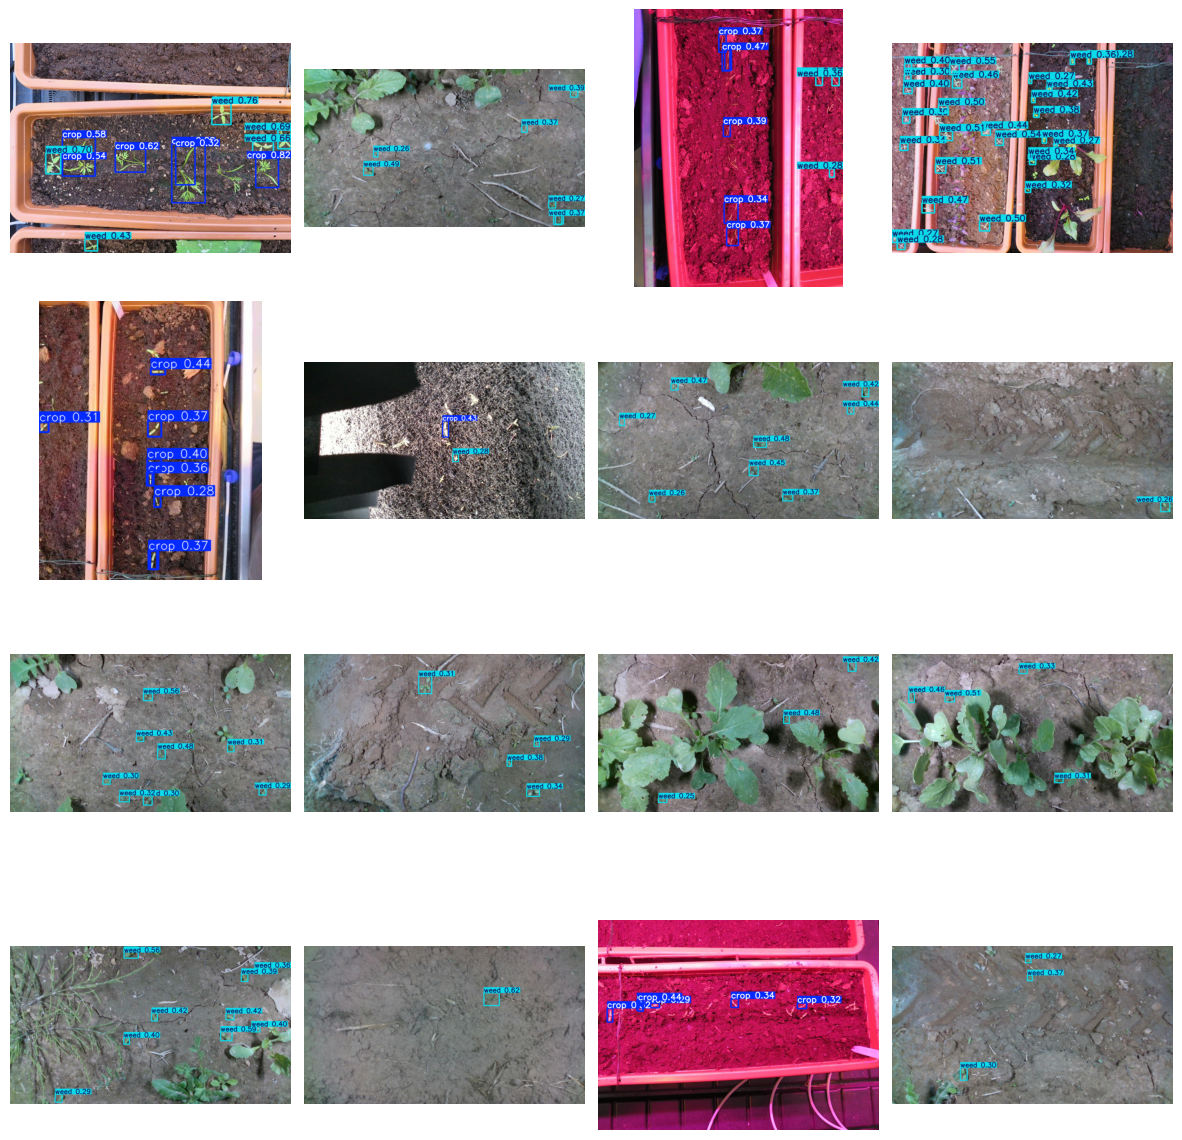

In [17]:
v8_trained = YOLO('/kaggle/working/ft_models/yolo_v8/weights/best.pt')
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    row_idx = i // 4
    col_idx = i % 4
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = weed_detection(img_path, v8_trained)
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')


plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [19]:
v8_result = pd.read_csv('/kaggle/working/ft_models/yolo_v8/results.csv')
v8_result.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
25,26,2165.81,1.65400,1.02723,1.01578,0.65363,0.76220,0.73988,0.40369,1.60516,1.11330,0.95134,0.000175,0.000175,0.000175
26,27,2248.57,1.61913,1.00494,1.00970,0.68156,0.70018,0.71663,0.38425,1.69265,1.06446,0.97371,0.000142,0.000142,0.000142
27,28,2331.36,1.58464,0.97295,1.00265,0.71919,0.68332,0.71793,0.36255,1.80069,1.09626,1.00602,0.000109,0.000109,0.000109
28,29,2414.04,1.55229,0.94937,0.99628,0.57395,0.75974,0.69678,0.36658,1.72099,1.08721,0.97577,0.000076,0.000076,0.000076
29,30,2496.70,1.54189,0.93952,0.99211,0.65929,0.71677,0.71424,0.37655,1.67297,1.05966,0.96542,0.000043,0.000043,0.000043


In [ ]:
def display_detection(img_path, model):
    detect_img = weed_detection(img_path, model)
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detect_img)
    plt.axis('off')
    plt.show()
# User provides the image path
user_image_path = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images/IMG_5949_JPG.rf.415d64b877765e8f2c7a0774df004066.jpg'

# Display detection result for the provided image
display_detection(user_image_path, final_model)